In [16]:
import numpy as np
import pints
import pints.plot
import pints_smol_moments_jit as toy
import matplotlib.pyplot as plt
from scipy.stats import moment
import pandas as pd



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [17]:

model = toy.SmolModel(None,None)


true_parameters = [0.0003, 900]


times = np.linspace(20, 97, 78)

df = pd.read_csv('s09_inference_input_multi_well_t_20.csv', header=None)
org_values = np.transpose(df.to_numpy())
print(np.shape(org_values))
org_values = org_values[19:,:]
print(np.shape(org_values))
times = np.linspace(39, 97, 59)

# 1st moment is mean, 1st centred moment should be array 6
centred_moment_1 = moment(org_values, moment=1, axis=1)
centred_moment_2 = moment(org_values, moment=2, axis=1)
centred_moment_3 = moment(org_values, moment=3, axis=1)
centred_moment_4 = moment(org_values, moment=4, axis=1)
centred_moment_5 = moment(org_values, moment=5, axis=1)

centred_moments = np.zeros((59,5))
centred_moments[:,0] = centred_moment_1
centred_moments[:,1] = centred_moment_2
centred_moments[:,2] = centred_moment_3
centred_moments[:,3] = centred_moment_4
centred_moments[:,4] = centred_moment_5

# print(centred_moments.shape)


(78, 100)
(59, 100)


Add noise to the data (using random sampling from normal distribution)

In [18]:

# noise = 9
# values = org_values + np.random.normal(0, noise, org_values.shape)

size_noise = 5
noise_value = 25
# # Create a list with the specified size filled with a placeholder value
noise_arr = [noise_value for _ in range(size_noise)]
noise_arr[0] = 1
noise_arr[1] = 10
noise_arr[2] = 100
noise_arr[3] = 5000
noise_arr[4] = 500000


Set-up pints problem and log likelihoods

In [19]:

problem = pints.MultiOutputProblem(model, times, centred_moments)

log_likelihood = pints.GaussianLogLikelihood(problem)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood.n_parameters()))
# print('New dimension: ' + str(log_likelihood_2.n_parameters()))

true_parameters += noise_arr
# print(true_parameters)



Original problem dimension: 2
New dimension: 7


Create uniform log prior

In [20]:

# Define the size of the list
size = 7
placeholder_lower_value = 0
placeholder_upper_value = 1000
 
# Create a list with the specified size filled with a placeholder value
prior_arr_lower = [placeholder_lower_value for _ in range(size)]
prior_arr_upper = [placeholder_upper_value for _ in range(size)]
prior_arr_lower[0] = 0.000001
prior_arr_upper[0] = 0.001
prior_arr_lower[1] = 1
prior_arr_upper[1] = 10000
prior_arr_lower[2] = 0
prior_arr_upper[2] = 10
prior_arr_lower[3] = 0
prior_arr_upper[3] = 2000
prior_arr_lower[4] = 0
prior_arr_upper[4] = 200000
prior_arr_lower[5] = 0
prior_arr_upper[5] = 20000000
prior_arr_lower[6] = 0
prior_arr_upper[6] = 1000000000


# log_prior = pints.UniformLogPrior(
#     [0.000001, 1, 1],
#     [0.01, 10000, 100]
#     )
log_prior = pints.UniformLogPrior(
    prior_arr_lower,
    prior_arr_upper
    )

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_97502/269346420.py:29: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


In [21]:

xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 5000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)



Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0
1     510     0:01.2
2     993     0:02.0
3     1497    0:03.1
20    9147    0:21.2
40    18843   0:40.9
60    30378   1:01.0
80    44025   1:23.4
100   59871   1:46.3
120   78726   2:12.0
140   100680   2:41.0
160   124893   3:12.1
180   151605   3:45.6
200   180327   4:21.0
220   211902   4:58.9
240   246609   5:40.1
260   283221   6:23.3
280   321882   7:08.4
300   362313   7:55.0
320   404553   8:43.1
340   449136   9:34.0
360   495954  10:26.9
380   545751  11:22.6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_log_likelihoods.py:832: RuntimeWarning: invalid value encountered in divide
  - np.sum(error**2, axis=0) / (2 * sigma**2))


400   597165  12:20.3
420   649020  13:18.2
440   700677  14:16.6
460   752409  15:15.9
480   804609  16:15.5
500   857166  17:17.1
520   910041  18:21.4
540   962619  19:28.8
560   1014501  20:35.4
580   1066995  21:43.1
600   1119243  22:50.8
620   1171707  23:58.1
640   1224039  25:06.3
660   1275921  26:11.8
680   1328337  27:16.7
700   1380477  28:23.4
720   1433304  29:27.8
740   1486119  30:34.1
760   1538259  31:40.0
780   1590186  32:45.2
800   1642389  33:51.1
820   1694775  34:57.1
840   1747143  36:02.4
860   1799577  37:07.9
880   1851999  38:14.0
900   1904394  39:19.9
920   1957089  40:25.8
940   2009784  41:31.5
960   2062185  42:38.3
980   2113803  43:44.1
1000  2166024  44:50.1
1020  2217894  45:55.4
1040  2269833  47:00.6
1060  2322138  48:07.3
1080  2374896  49:14.8
1100  2427309  50:20.8
1120  2479929  51:27.9
1140  2532276  52:34.9
1160  2584938  53:42.9
1180  2636853  54:49.3
1200  2689107  55:57.0
1220  2740686  57:03.2
1240  2793048  58:10.8
1260  2845488  59:1

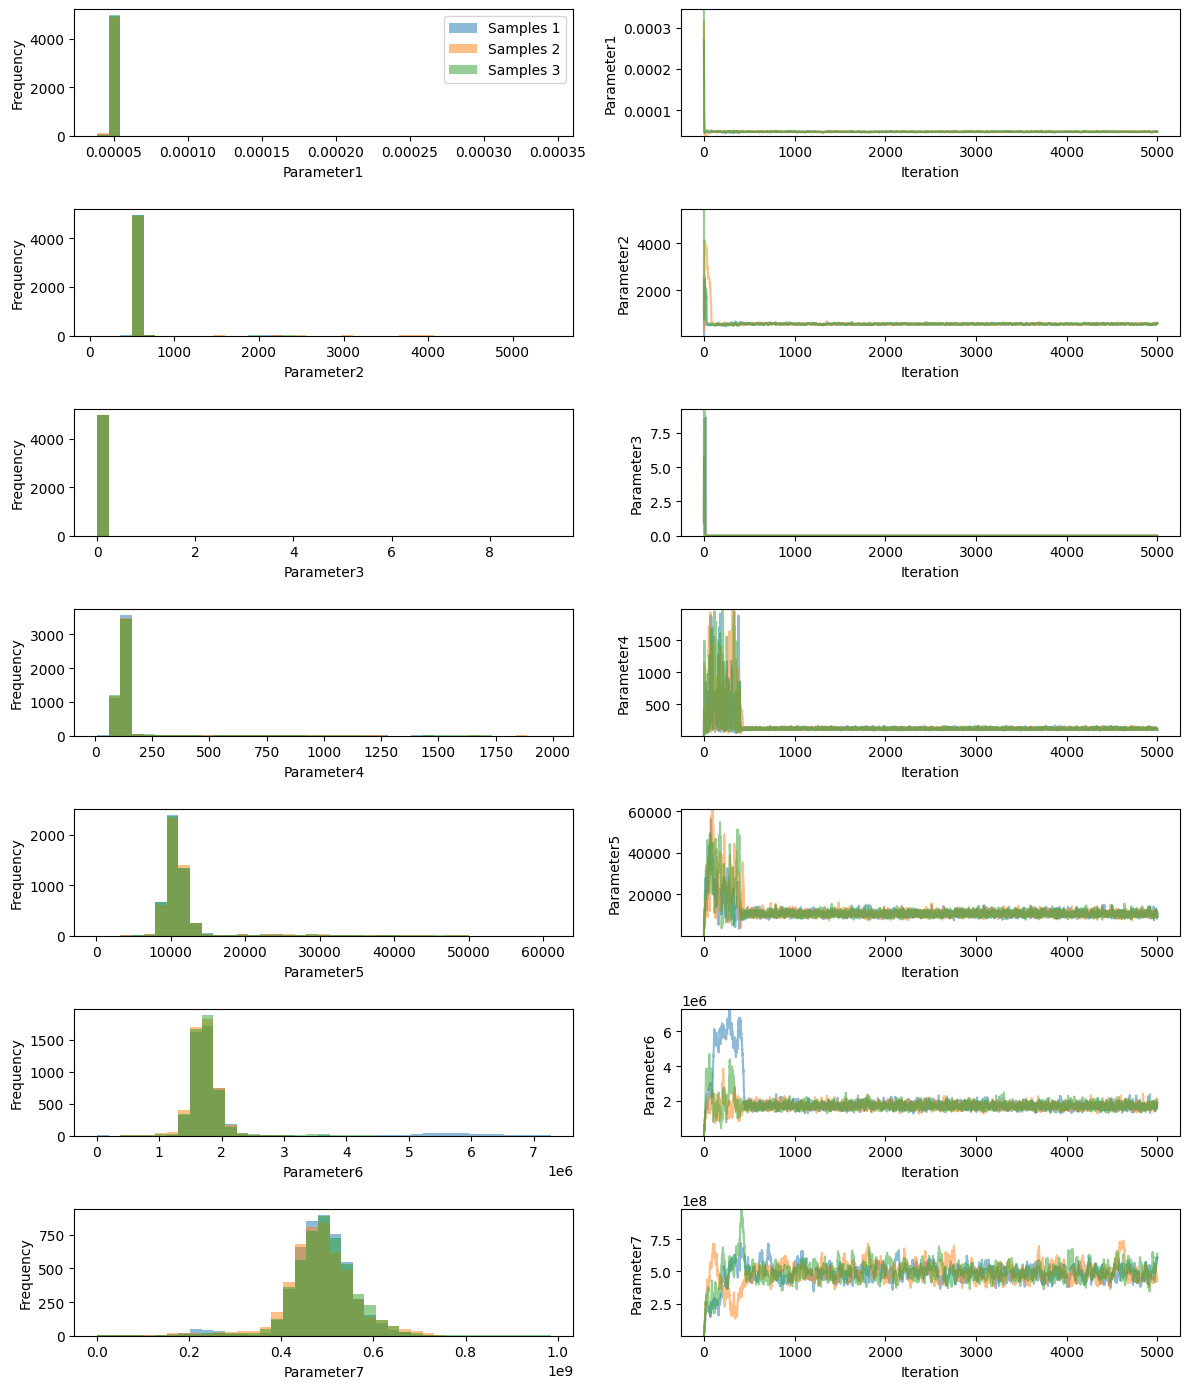

In [22]:

pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()


In [23]:

# ITERS = 100
AllChains = chains[0,:-int(2*ITERS/4),:]
# np.asarray(AllChains)
print(np.shape(AllChains))
print(AllChains[0])
print(AllChains)


(2500, 7)
[2.7e-04 8.1e+02 9.0e-01 9.0e+00 9.0e+01 4.5e+03 4.5e+05]
[[2.70000000e-004 8.10000000e+002 9.00000000e-001 ... 9.00000000e+001
  4.50000000e+003 4.50000000e+005]
 [2.46862474e-004 4.41462699e+002 5.22850682e+000 ... 3.61681797e+003
  5.75716589e+004 3.09184770e+006]
 [1.65084704e-004 8.60742477e+001 5.73998838e+000 ... 4.46467568e+003
  8.68246293e+004 3.92827689e+006]
 ...
 [4.77900389e-005 5.78006872e+002 1.59610146e-162 ... 1.05268311e+004
  1.54042094e+006 5.64602390e+008]
 [4.75920883e-005 5.78793206e+002 1.59663608e-162 ... 9.24895894e+003
  1.52767145e+006 5.65206556e+008]
 [4.76251209e-005 5.86601611e+002 1.59099461e-162 ... 1.00129014e+004
  1.52490686e+006 5.67967834e+008]]


In [24]:

for I in range(3-1):
    AllChains_add = chains[I+1,:-int(2*ITERS/4),:]
    AllChains = np.concatenate((AllChains,AllChains_add), axis=0)


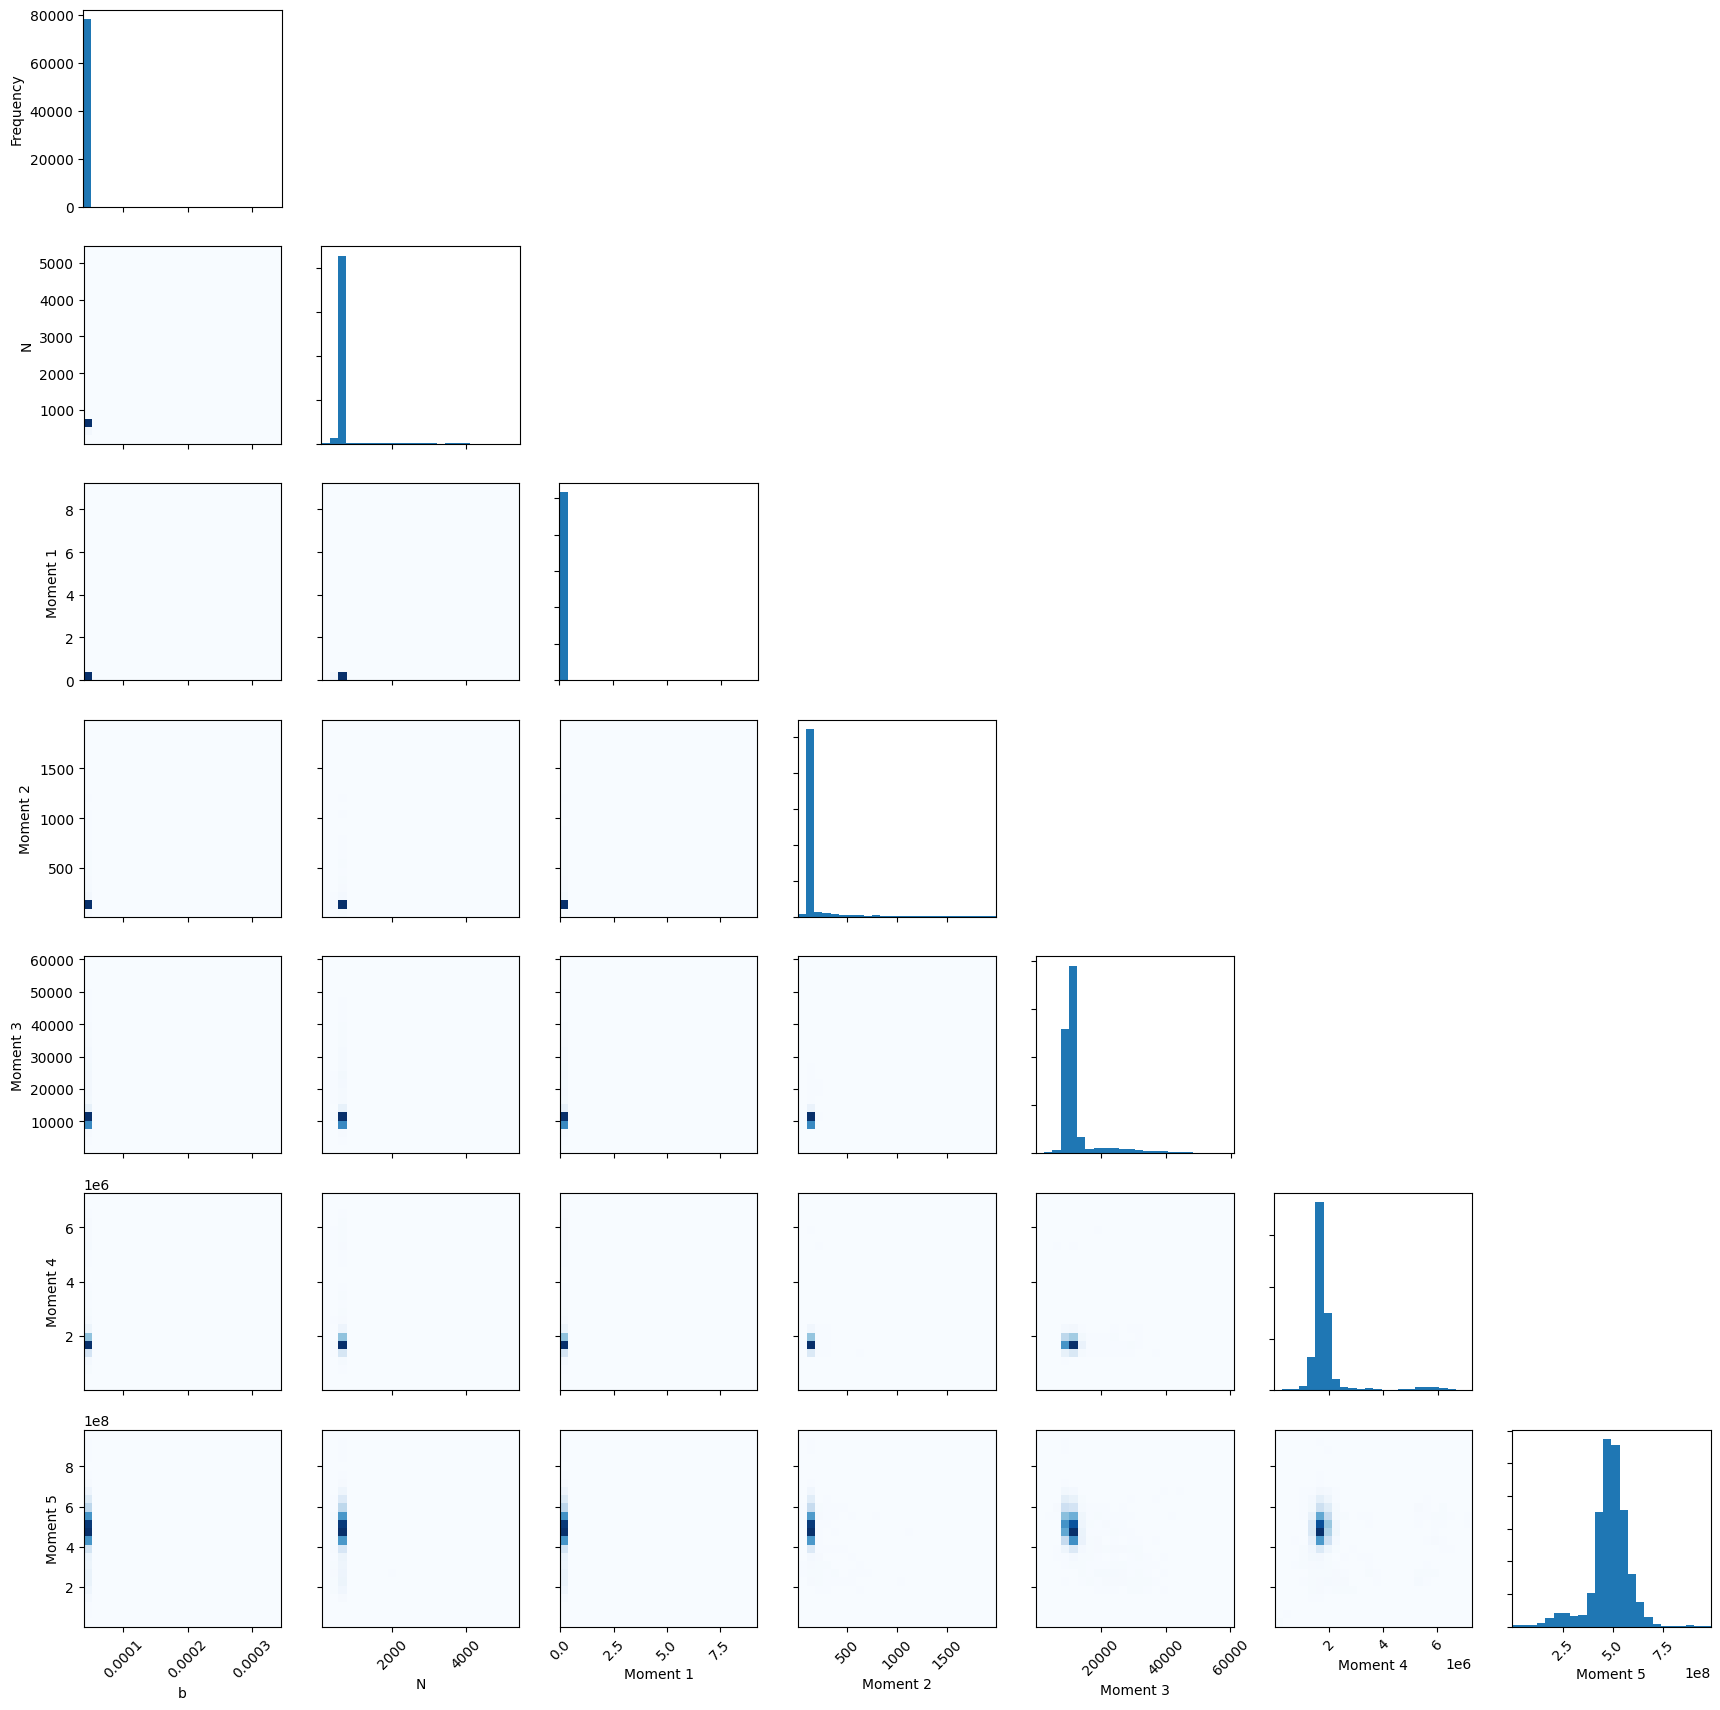

In [25]:


parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"])
plt.show()

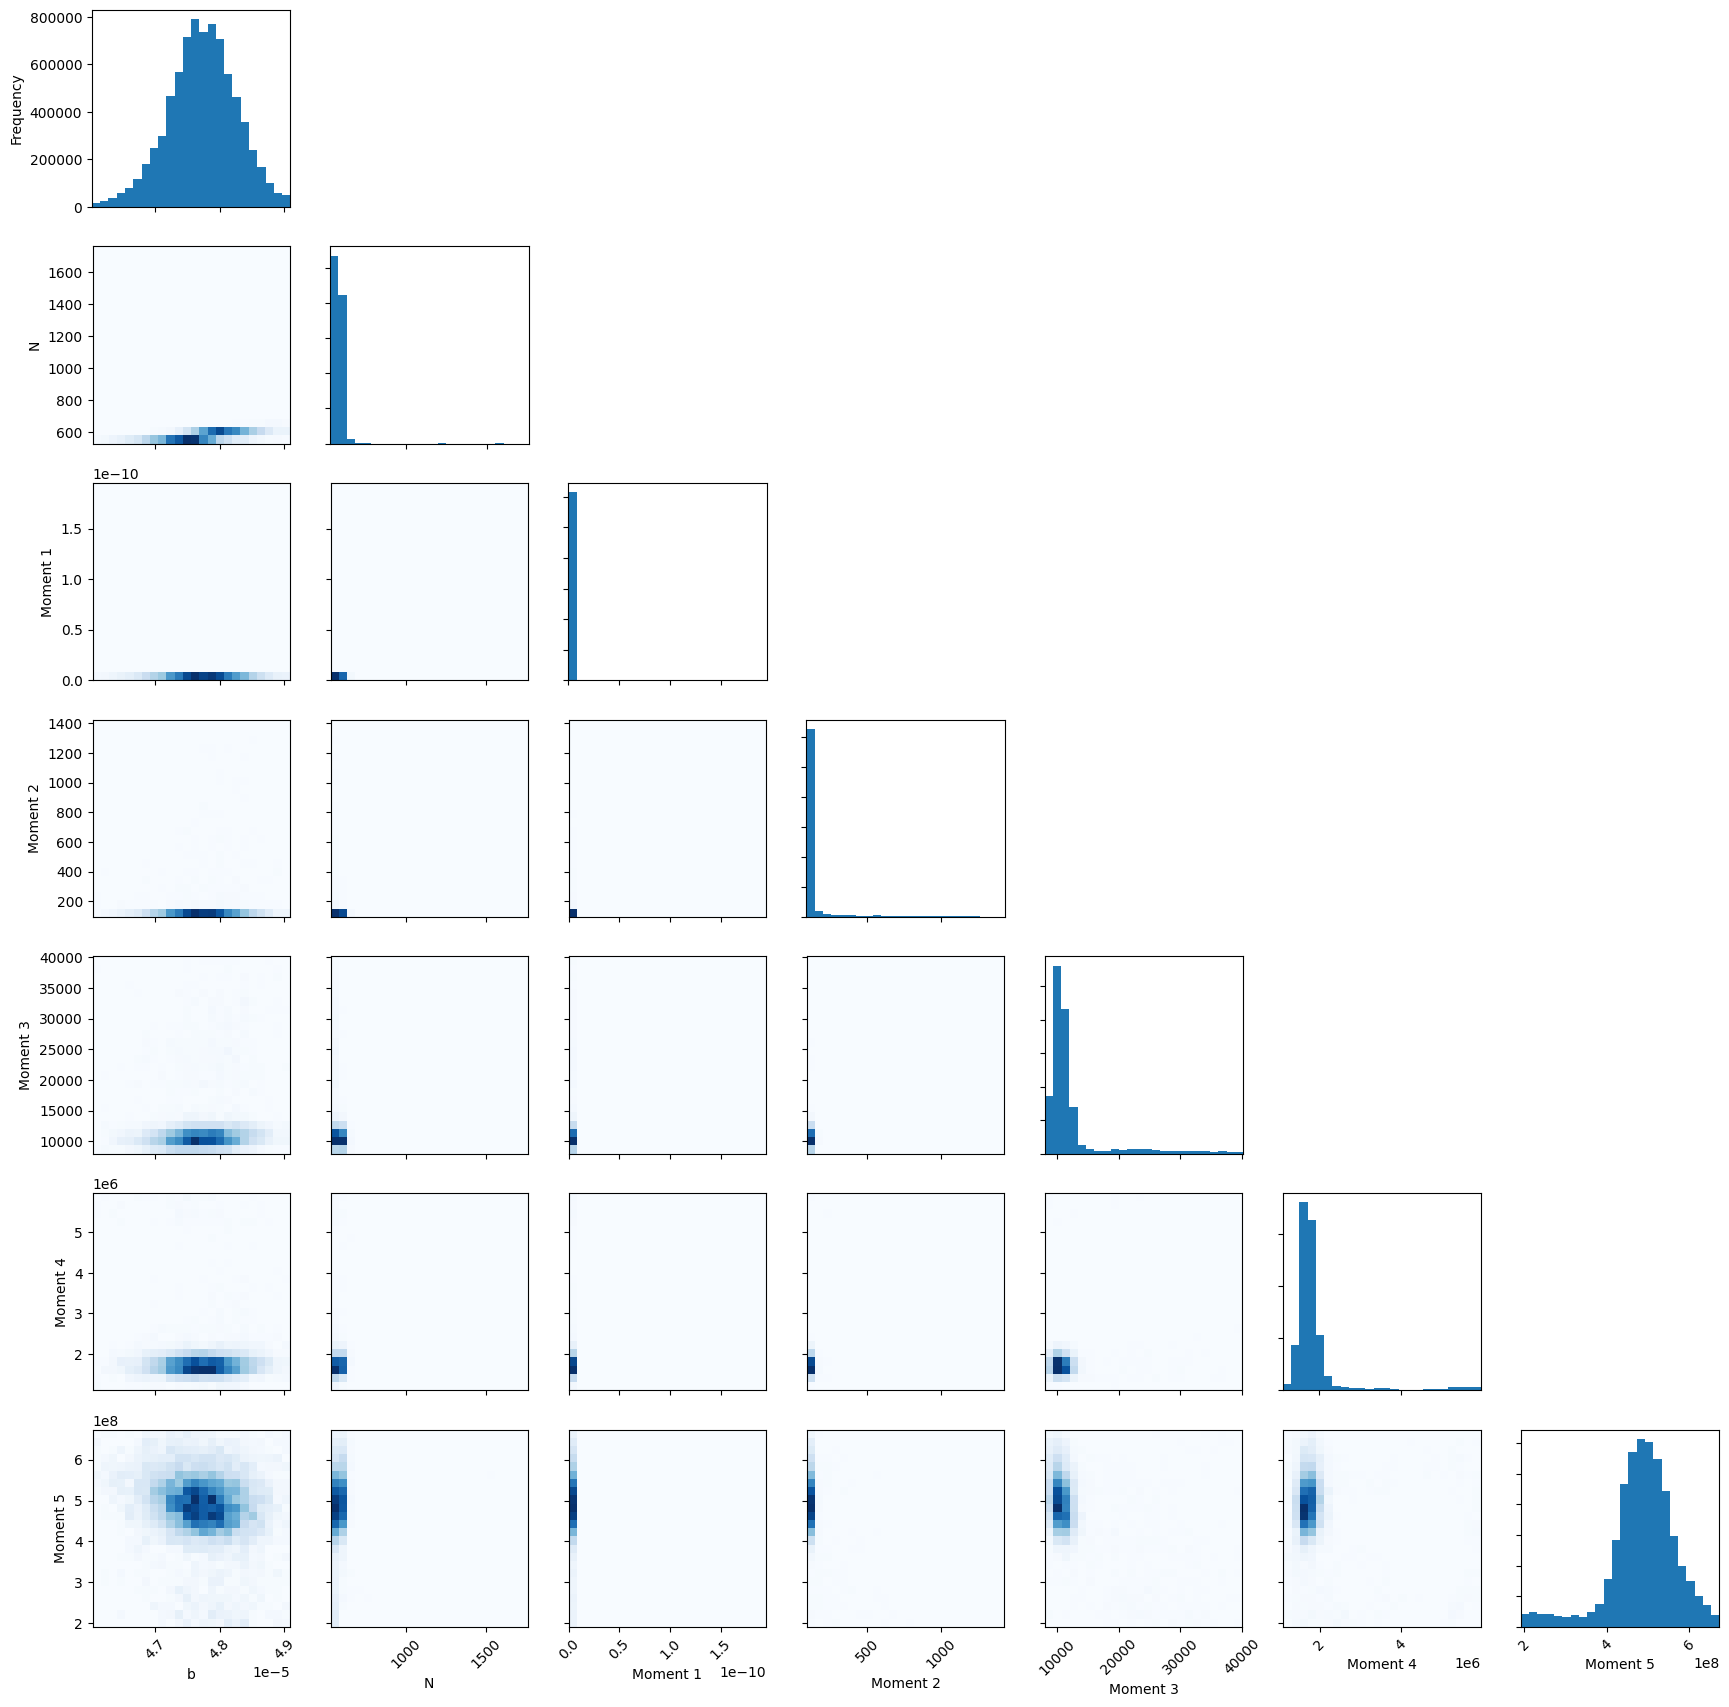

In [26]:
parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"],
                    n_percentiles=97)
plt.show()

[2.7e-04 8.1e+02 9.0e-01 9.0e+00 9.0e+01 4.5e+03 4.5e+05]


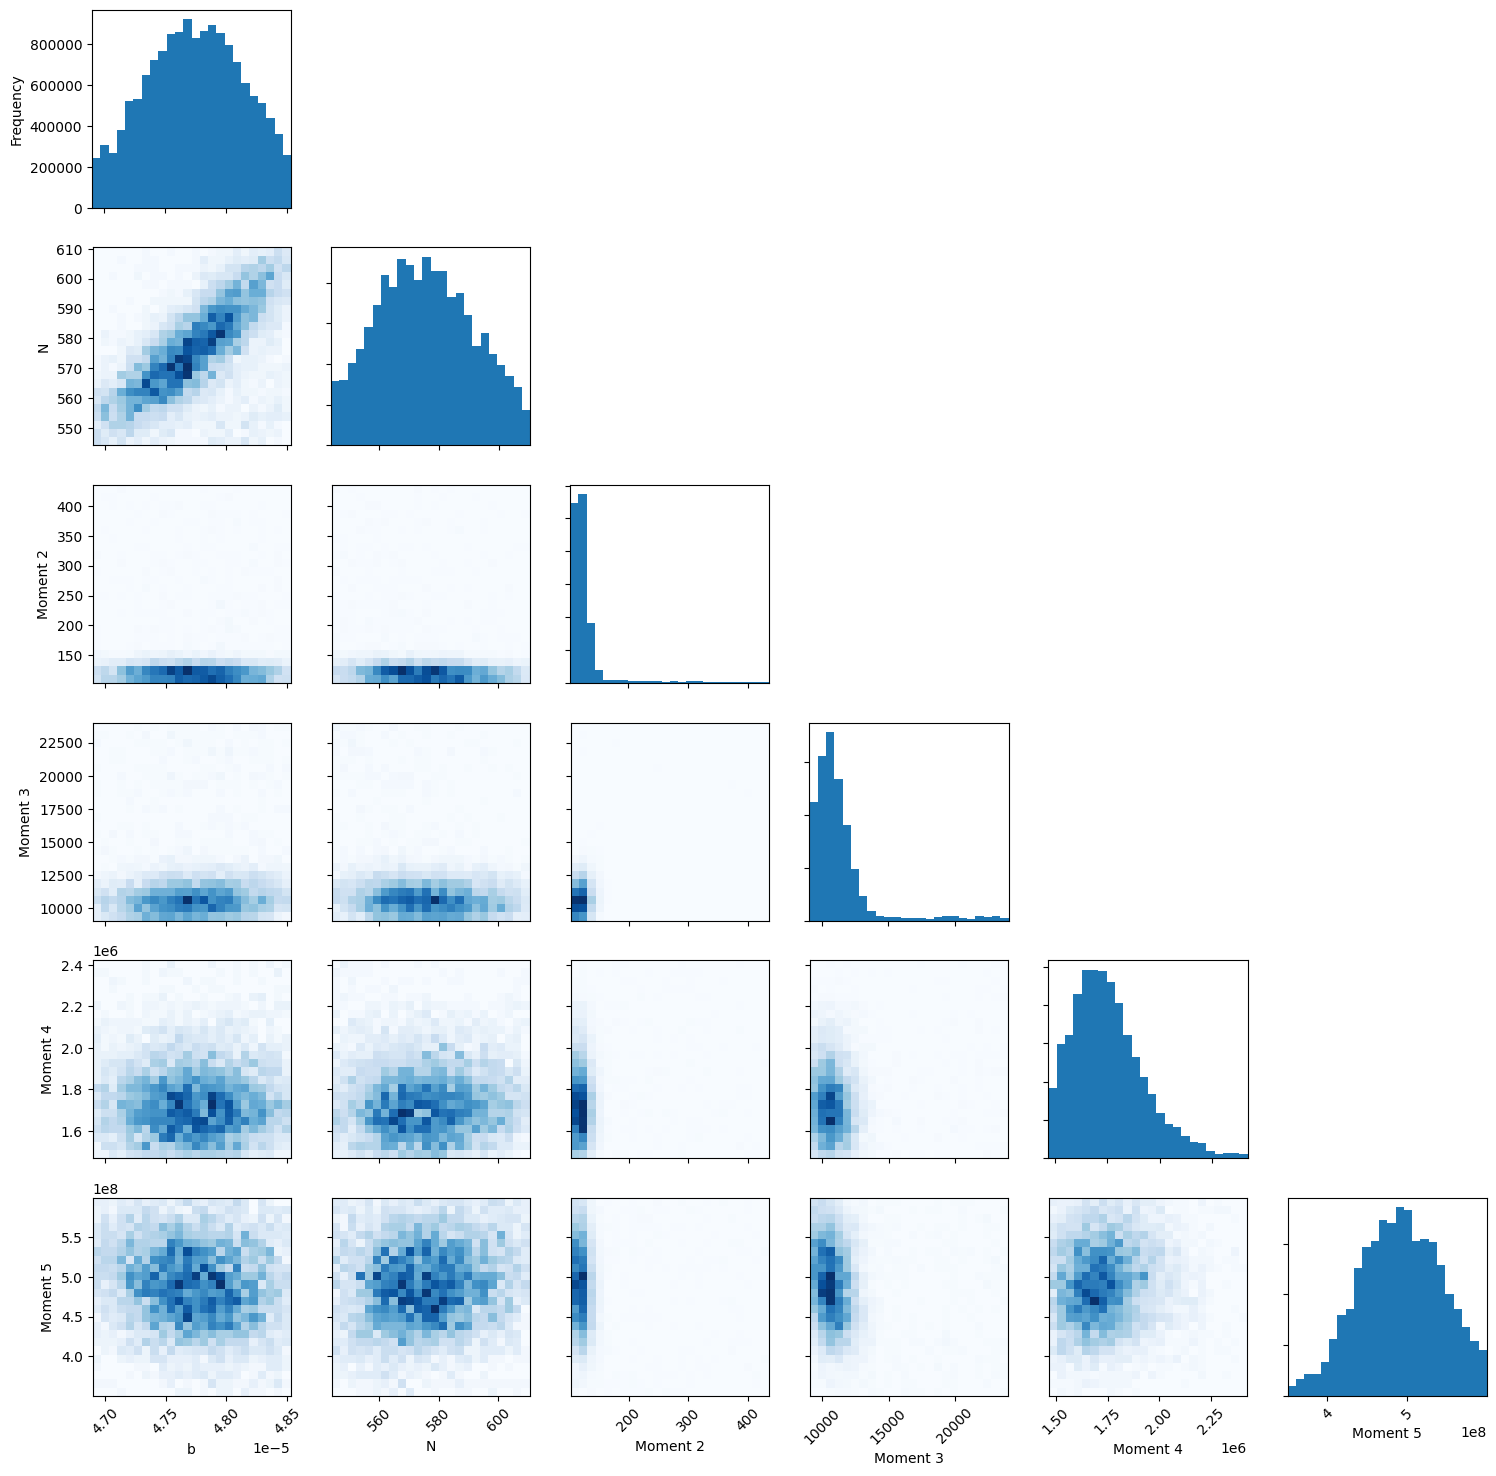

In [27]:
parameter_names = ["b","N", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)
print(AllChains[0])
pints.plot.pairwise(AllChains[:,[0,1,3,4,5,6]], heatmap=True, 
                    parameter_names=["b","N", "Moment 2", "Moment 3", "Moment 4", "Moment 5"],
                    n_percentiles = 85)
plt.show()


In [28]:
parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
results = pints.MCMCSummary(chains=chains[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)


<class 'pints._mcmc._summary.MCMCSummary'>
param     mean          std.         2.5%          25%           50%           75%           97.5%         rhat    ess      ess per sec.
--------  ------------  -----------  ------------  ------------  ------------  ------------  ------------  ------  -------  --------------
b         0.00          0.00         0.00          0.00          0.00          0.00          0.00          1.01    486.76   0.03
N         577.46        19.14        543.90        564.06        576.46        590.09        616.90        1.01    489.92   0.03
Moment 1  0.00          0.00         0.00          0.00          0.00          0.00          0.00          nan     nan      nan
Moment 2  119.01        11.71        98.65         110.85        117.96        126.32        144.82        1.00    1873.24  0.11
Moment 3  10679.48      1119.16      8741.24       9903.08       10592.98      11356.65      13131.83      1.00    1409.82  0.09
Moment 4  1719347.21    165420.87    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_diagnostics.py:235: RuntimeWarning: invalid value encountered in divide
  rhat = np.sqrt((n - 1.0) / n + b / (w * n))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_diagnostics.py:16: RuntimeWarning: divide by zero encountered in divide
  x = (x - np.mean(x)) / (np.std(x) * np.sqrt(len(x)))


In [29]:
from tabulate import tabulate
class MyMCMCSummary(pints.MCMCSummary):
    def __str__(self):
        """
        Prints posterior summaries for all parameters to the console, including
        the parameter name, posterior mean, posterior std deviation, the
        2.5%, 25%, 50%, 75% and 97.5% posterior quantiles, rhat, effective
        sample size (ess) and ess per second of run time.
        """
        if self._summary_str is None:
            headers = [
                'param', 'mean', 'std.',
                '2.5%', '25%', '50%', '75%', '97.5%',
                'rhat', 'ess']
            if self._time is not None:
                headers.append('ess per sec.')

            self._summary_str = tabulate(
                self._summary_list,
                headers=headers,
                numalign='left',
                floatfmt='.3g',
            )

        return self._summary_str
    


In [30]:

parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
results = MyMCMCSummary(chains=chains[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

<class '__main__.MyMCMCSummary'>
param     mean      std.      2.5%       25%        50%        75%        97.5%      rhat    ess       ess per sec.
--------  --------  --------  ---------  ---------  ---------  ---------  ---------  ------  --------  --------------
b         4.77e-05  4.94e-07  4.68e-05   4.74e-05   4.78e-05   4.81e-05   4.87e-05   1.01    487       0.0297
N         577       19.1      544        564        576        590        617        1.01    490       0.0299
Moment 1  1.6e-162  0         1.57e-162  1.58e-162  1.59e-162  1.61e-162  1.68e-162  nan     nan       nan
Moment 2  119       11.7      98.7       111        118        126        145        1       1.87e+03  0.114
Moment 3  1.07e+04  1.12e+03  8.74e+03   9.9e+03    1.06e+04   1.14e+04   1.31e+04   1       1.41e+03  0.0861
Moment 4  1.72e+06  1.65e+05  1.43e+06   1.6e+06    1.71e+06   1.83e+06   2.06e+06   1       1.07e+03  0.0653
Moment 5  4.91e+08  5.59e+07  3.98e+08   4.52e+08   4.86e+08   5.23e+08   6.2